In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

data = pd.read_csv('D:\\Avanthi\\personal\\Credit-Default-Prediction\\Dataset\\credit_card.csv', skiprows=[0])  # Skip the first row with X1, X2, etc labels

# Drop the first column (ID)
data = data.drop('ID', axis=1)

# Separate features and target
X = data.drop('default payment next month', axis=1)  # Target variable
y = data['default payment next month']  # Target variable

# Print dataset information
print("Dataset shape:", data.shape)
print("\nFeature names:", X.columns.tolist())
print("\nSample of first few rows:")
print(X.head())

Dataset shape: (30000, 24)

Feature names: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Sample of first few rows:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455       3261   

In [4]:
# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to keep column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Print the scaled data
print("\nScaled features:")
print(X_scaled.head())


Scaled features:
   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1  -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2  -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3  -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4  -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0 -0.696663 -0.666599 -1.530046  ...  -0.667993  -0.672497  -0.663059   
1  0.138865  0.188746  0.234917  ...  -0.639254  -0.621636  -0.606229   
2  0.138865  0.188746  0.234917  ...  -0.482408  -0.449730  -0.417188   
3  0.138865  0.188746  0.234917  ...   0.032846  -0.232373  -0.186729   
4 -0.696663  0.188746  0.234917  ...  -0.161189  -0.346997  -0.348137   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0

In [5]:
# Split the dataset into training (70%), testing (15%), and validation (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nData split sizes:")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Data split sizes:
Training set shape: (21000, 23)
Validation set shape: (4500, 23)
Test set shape: (4500, 23)


In [6]:
# Constants
NUM_OF_EPOCHS = 25
BATCH_SIZE = 32

# Build the model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Model summary
print("\nModel Architecture:")
model.summary()


Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None,

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=NUM_OF_EPOCHS,
    validation_data=(X_val, y_val),
    batch_size=BATCH_SIZE,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# print("Scaler means:", scaler.mean_)
# print("Scaler scales:", scaler.scale_)

Epoch 1/25
657/657 [==============================] - 3s 3ms/step - loss: 0.4742 - accuracy: 0.8041 - val_loss: 0.4407 - val_accuracy: 0.8162
Epoch 2/25
657/657 [==============================] - 3s 4ms/step - loss: 0.4420 - accuracy: 0.8152 - val_loss: 0.4371 - val_accuracy: 0.8189
Epoch 3/25
657/657 [==============================] - 2s 3ms/step - loss: 0.4369 - accuracy: 0.8179 - val_loss: 0.4347 - val_accuracy: 0.8224
Epoch 4/25
657/657 [==============================] - 2s 3ms/step - loss: 0.4322 - accuracy: 0.8212 - val_loss: 0.4303 - val_accuracy: 0.8204
Epoch 5/25
657/657 [==============================] - 2s 4ms/step - loss: 0.4304 - accuracy: 0.8200 - val_loss: 0.4287 - val_accuracy: 0.8207
Epoch 6/25
657/657 [==============================] - 2s 3ms/step - loss: 0.4273 - accuracy: 0.8206 - val_loss: 0.4306 - val_accuracy: 0.8240
Epoch 7/25
657/657 [==============================] - 2s 4ms/step - loss: 0.4271 - accuracy: 0.8206 - val_loss: 0.4338 - val_accuracy: 0.8216
Epoch 

In [8]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

141/141 [==============================] - 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3535
           1       0.56      0.39      0.46       965

    accuracy                           0.80      4500
   macro avg       0.71      0.66      0.67      4500
weighted avg       0.79      0.80      0.79      4500



141/141 [==============================] - 0s 2ms/step


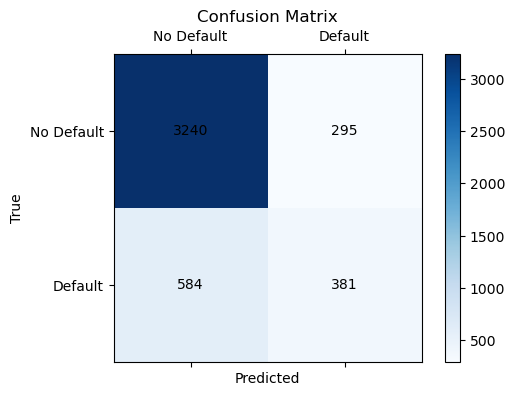

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(cm, cmap='Blues')

# Add color bar
fig.colorbar(cax)

# Add labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Set the ticks to represent the class labels
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['No Default', 'Default'])
ax.set_yticklabels(['No Default', 'Default'])

# Annotate the matrix with the values
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()

In [7]:
# Save the Keras model
model.save('credit_card_model.h5')

In [8]:
# Define representative dataset for TFLite conversion
def representative_dataset():
    for i in range(100):
        yield [X_test[i:i+1].astype(np.float32)]

# Save as SavedModel format
tf.saved_model.save(model, 'credit_card_model')

# Convert to TFLite
# Load the H5 model for TFLite conversion
loaded_model = tf.keras.models.load_model('credit_card_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

# Set optimization options
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float32]
converter.representative_dataset = representative_dataset

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model
with open('credit_card_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: credit_card_model\assets
INFO:tensorflow:Assets written to: C:\Users\dell\AppData\Local\Temp\tmprqdto8rh\assets


In [9]:
# Test the TFLite model
interpreter = tf.lite.Interpreter(model_path="credit_card_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test prediction with sample data
sample_input = X_test[:1].astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], sample_input)
interpreter.invoke()
tflite_output = interpreter.get_tensor(output_details[0]['index'])
print("TFLite prediction:", tflite_output)

# Compare with original model
keras_output = model.predict(sample_input)
print("Keras prediction:", keras_output)

TFLite prediction: [[0.01806238]]
1/1 [==============================] - 0s 68ms/step
Keras prediction: [[0.01806239]]


In [ ]:
# Generate C header file
def hex_to_c_array(hex_data, var_name):
    c_str = ""
    
    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'
    
    # Add metadata
    c_str += "/*\n Generated Credit Card Default Prediction Model\n"
    c_str += " DO NOT EDIT - Auto-generated file\n"
    c_str += f" Generated on: {pd.Timestamp.now()}\n"
    c_str += f" Model Details:\n"
    c_str += f" - Input Features: {X_train.shape[1]}\n"
    c_str += f" - Training Epochs: {NUM_OF_EPOCHS}\n"
    c_str += f" - Batch Size: {BATCH_SIZE}\n"
    c_str += f" - Test Accuracy: {test_accuracy:.4f}\n"
    c_str += "*/\n\n"
    
    # Model architecture constants
    c_str += f"const int INPUT_SIZE = {X_train.shape[1]};\n"
    c_str += f"const int DENSE1_SIZE = 128;\n"
    c_str += f"const int DENSE2_SIZE = 64;\n"
    c_str += f"const int DENSE3_SIZE = 32;\n"
    c_str += f"const float DROPOUT1_RATE = 0.2f;\n"
    c_str += f"const int DENSE4_SIZE = 64;\n"
    c_str += f"const float DROPOUT2_RATE = 0.3f;\n"
    c_str += f"const int DENSE5_SIZE = 32;\n"
    c_str += f"const int OUTPUT_SIZE = 1;\n\n"
    
    # Add array length
    c_str += f"const unsigned int {var_name}_len = {len(hex_data)};\n\n"
    
    # Create the array
    c_str += f"alignas(8) const unsigned char {var_name}[] = {{\n"
    hex_array = []
    for i, val in enumerate(hex_data):
        hex_str = format(val, '#04x')
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n'
        hex_array.append(hex_str)
    
    c_str += format(''.join(hex_array)) + '\n};\n\n'
    c_str += '#endif //' + var_name.upper() + '_H'
    return c_str

# Generate and save the C header file
with open("credit_card_model.h", 'w') as file:
    file.write(hex_to_c_array(tflite_model, "credit_card_model"))

# Load the dataset for scaling (without ID and target columns)
data = pd.read_csv('D:\\Avanthi\\personal\\Credit-Default-Prediction\\Dataset\\credit_card.csv', skiprows=[0])  

# Drop the first column (ID) and target column (last column)
data = data.drop('ID', axis=1)

# Separate features and target
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Print feature count and names
print("Number of features in X:", X.shape[1])
print("Feature names in X:", X.columns.tolist())

Number of features in X: 23
Feature names in X: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample data from dataset (including ID and last column as default payment next month)
sample1 = np.array([13,630000,2,2,2,41,-1,0,-1,-1,-1,-1,12137,6500,6500,6500,6500,2870,1000,6500,6500,6500,2870,0,0])
sample2 = np.array([14,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1])
sample3 = np.array([16,50000,2,3,3,23,1,2,0,0,0,0,50614,29173,28116,28771,29531,30211,0,1500,1100,1200,1300,1100,0])
sample4 = np.array([17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1])

# Drop the ID column (first column) and target column (last column) for each sample
sample1 = sample1[1:-1]
sample2 = sample2[1:-1]
sample3 = sample3[1:-1]
sample4 = sample4[1:-1]

# Load the original dataset to fit the scaler (without ID and target columns)
data = pd.read_csv('D:\\Avanthi\\personal\\Credit-Default-Prediction\\Dataset\\credit_card.csv', skiprows=[0])
data = data.drop(['ID', 'default payment next month'], axis=1)

# Fit the StandardScaler on the dataset (only features)
scaler = StandardScaler()
scaler.fit(data)

# Scale the samples individually
sample1_scaled = scaler.transform([sample1]).astype(np.float32)[0]
sample2_scaled = scaler.transform([sample2]).astype(np.float32)[0]
sample3_scaled = scaler.transform([sample3]).astype(np.float32)[0]
sample4_scaled = scaler.transform([sample4]).astype(np.float32)[0]

# Load the TFLite model
tflite_model_path = 'credit_card_model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)

# Allocate tensors (necessary for running inference)
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Process each sample individually
for i, sample in enumerate([sample1_scaled, sample2_scaled, sample3_scaled, sample4_scaled]):
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], np.expand_dims(sample, axis=0))

    # Run inference
    interpreter.invoke()

    # Get the output tensor (for binary classification, output is a probability)
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Determine the predicted class and expected output
    predicted_class = int(output_data[0] > 0.5)
    expected_output = [0, 1, 0, 1][i]

    print(f"Sample {i+1}:")
    print(f"Predicted output (0 or 1): {predicted_class}")
    print(f"Prediction probability: {output_data[0]}")
    print(f"Expected output: {expected_output}")
    print()

Sample 1:
Predicted output (0 or 1): 0
Prediction probability: [0.00014098]
Expected output: 0

Sample 2:
Predicted output (0 or 1): 1
Prediction probability: [0.90630955]
Expected output: 1

Sample 3:
Predicted output (0 or 1): 0
Prediction probability: [0.3796733]
Expected output: 0

Sample 4:
Predicted output (0 or 1): 1
Prediction probability: [0.5220442]
Expected output: 1



c:\Users\dell\anaconda3\envs\IoT\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\dell\anaconda3\envs\IoT\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\dell\anaconda3\envs\IoT\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\dell\anaconda3\envs\IoT\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
